**DATASET**
*   alcohol - Алкоголь
*   malic_acid - Яблочная кислота
*   ash - Пепел
*   alcalinity_of_ash - Щелочность золы
*   magnesium - Магний
*   total_phenols - Всего фенолов
*   flavanoids - Флаваноиды
*   nonflavanoid_phenols - Нефлаваноидные фенолы
*   proanthocyanins - Проантоцианы
*   color_intensity - Интенсивность цвета
*   hue - Оттенок
*   od280/od315_of_diluted_wines - OD280 / OD315 разбавленных вин
*   proline - Пролин

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
wine = load_wine(as_frame=True)
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [ ]:
df.shape

(178, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
df.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

In [ ]:
df.target.unique()

array([0, 1, 2])

In [ ]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

**Модель логистической бинарной (2 класса) классификации**

In [ ]:
# Данные с 0 и 1 классами вина
data = df[df.target != 2]

data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [ ]:
data.shape

(130, 14)

In [ ]:
data.target.unique()

array([0, 1])

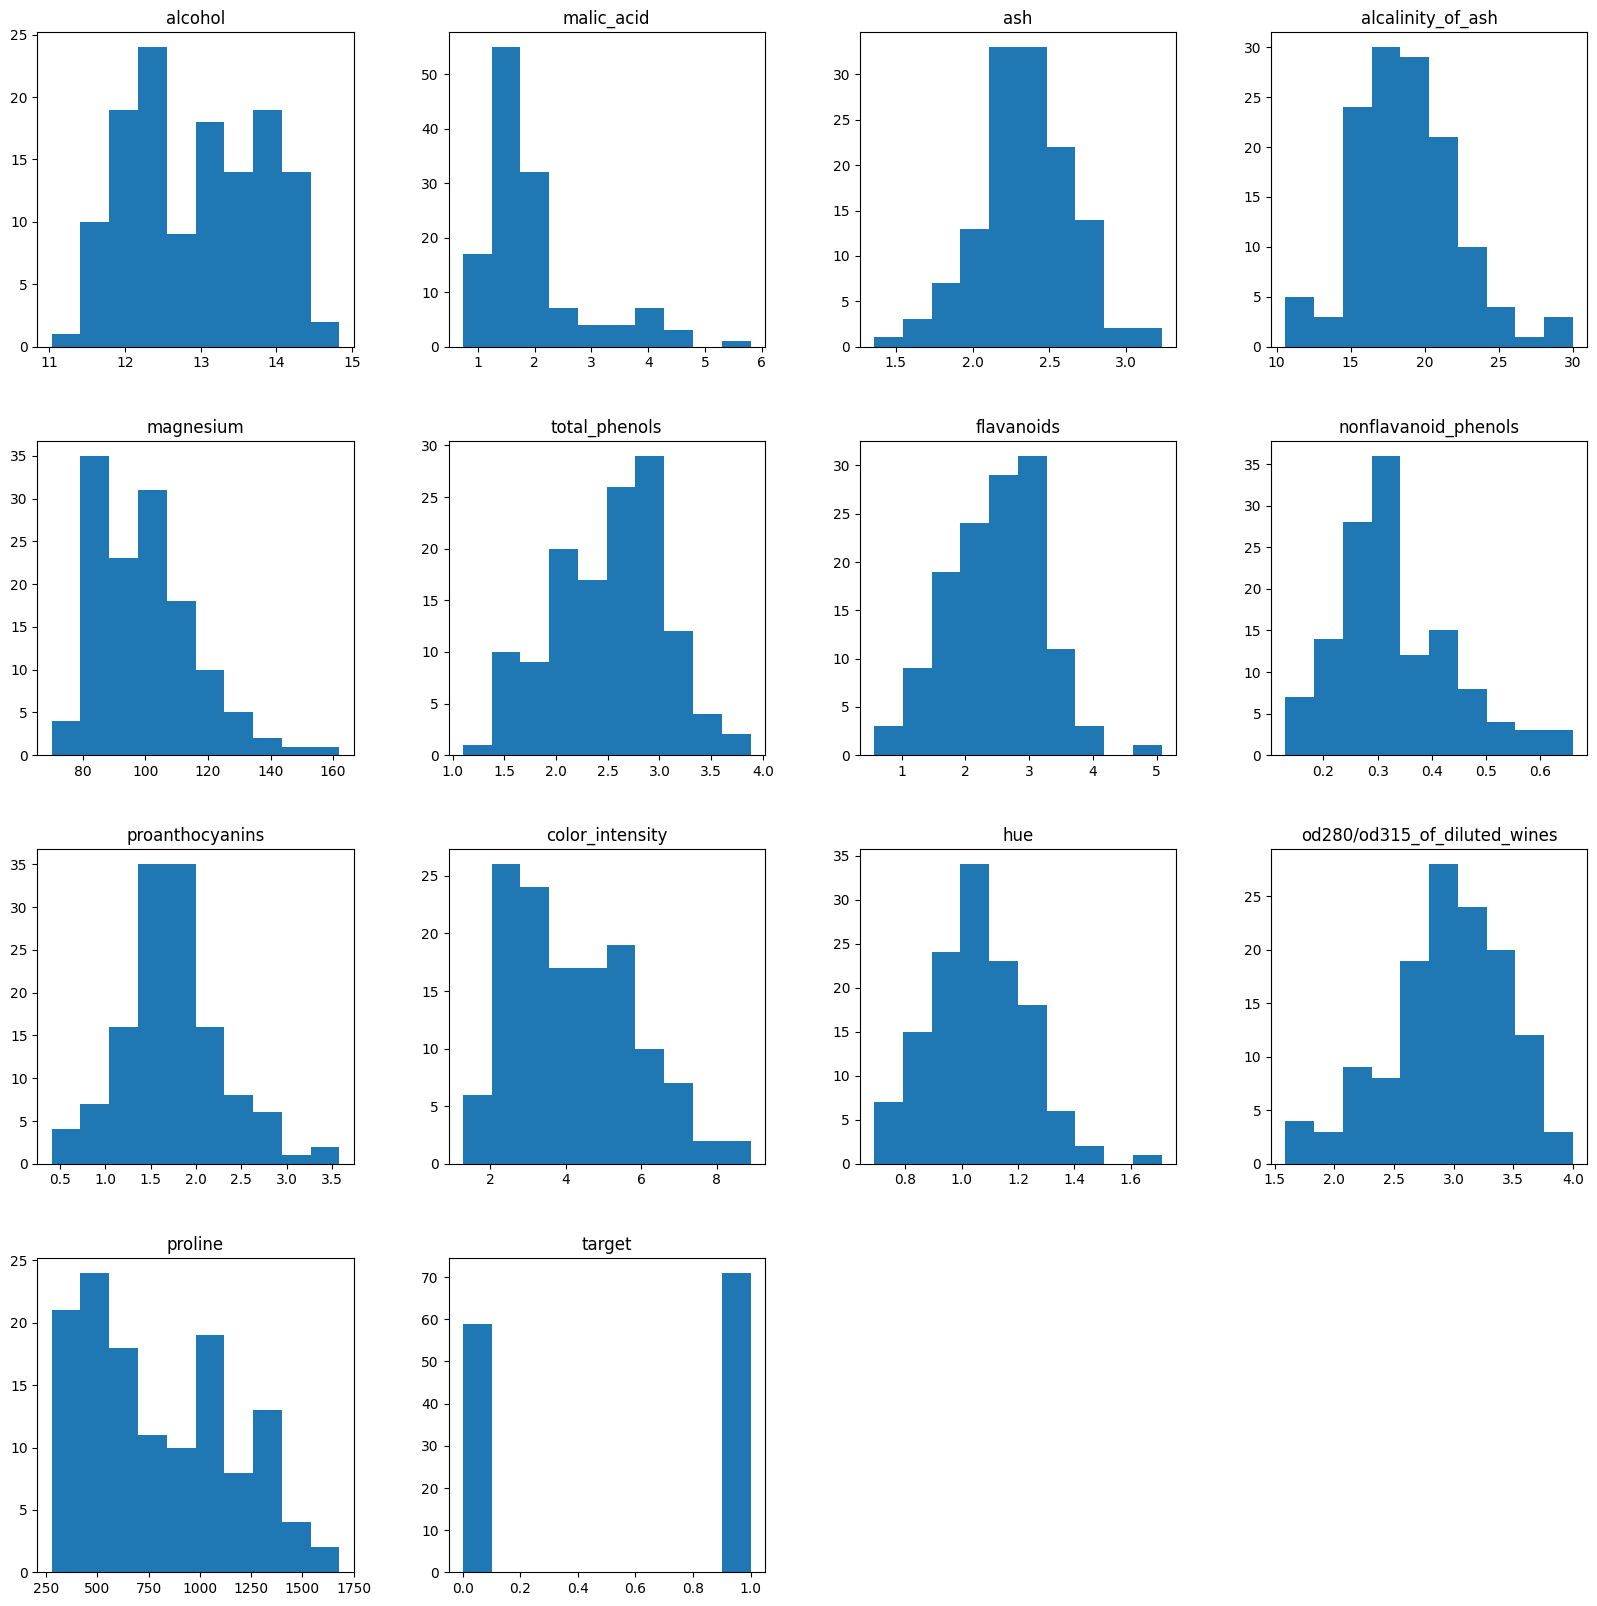

In [ ]:
data.hist(figsize=(20, 20), grid=False)
plt.show()

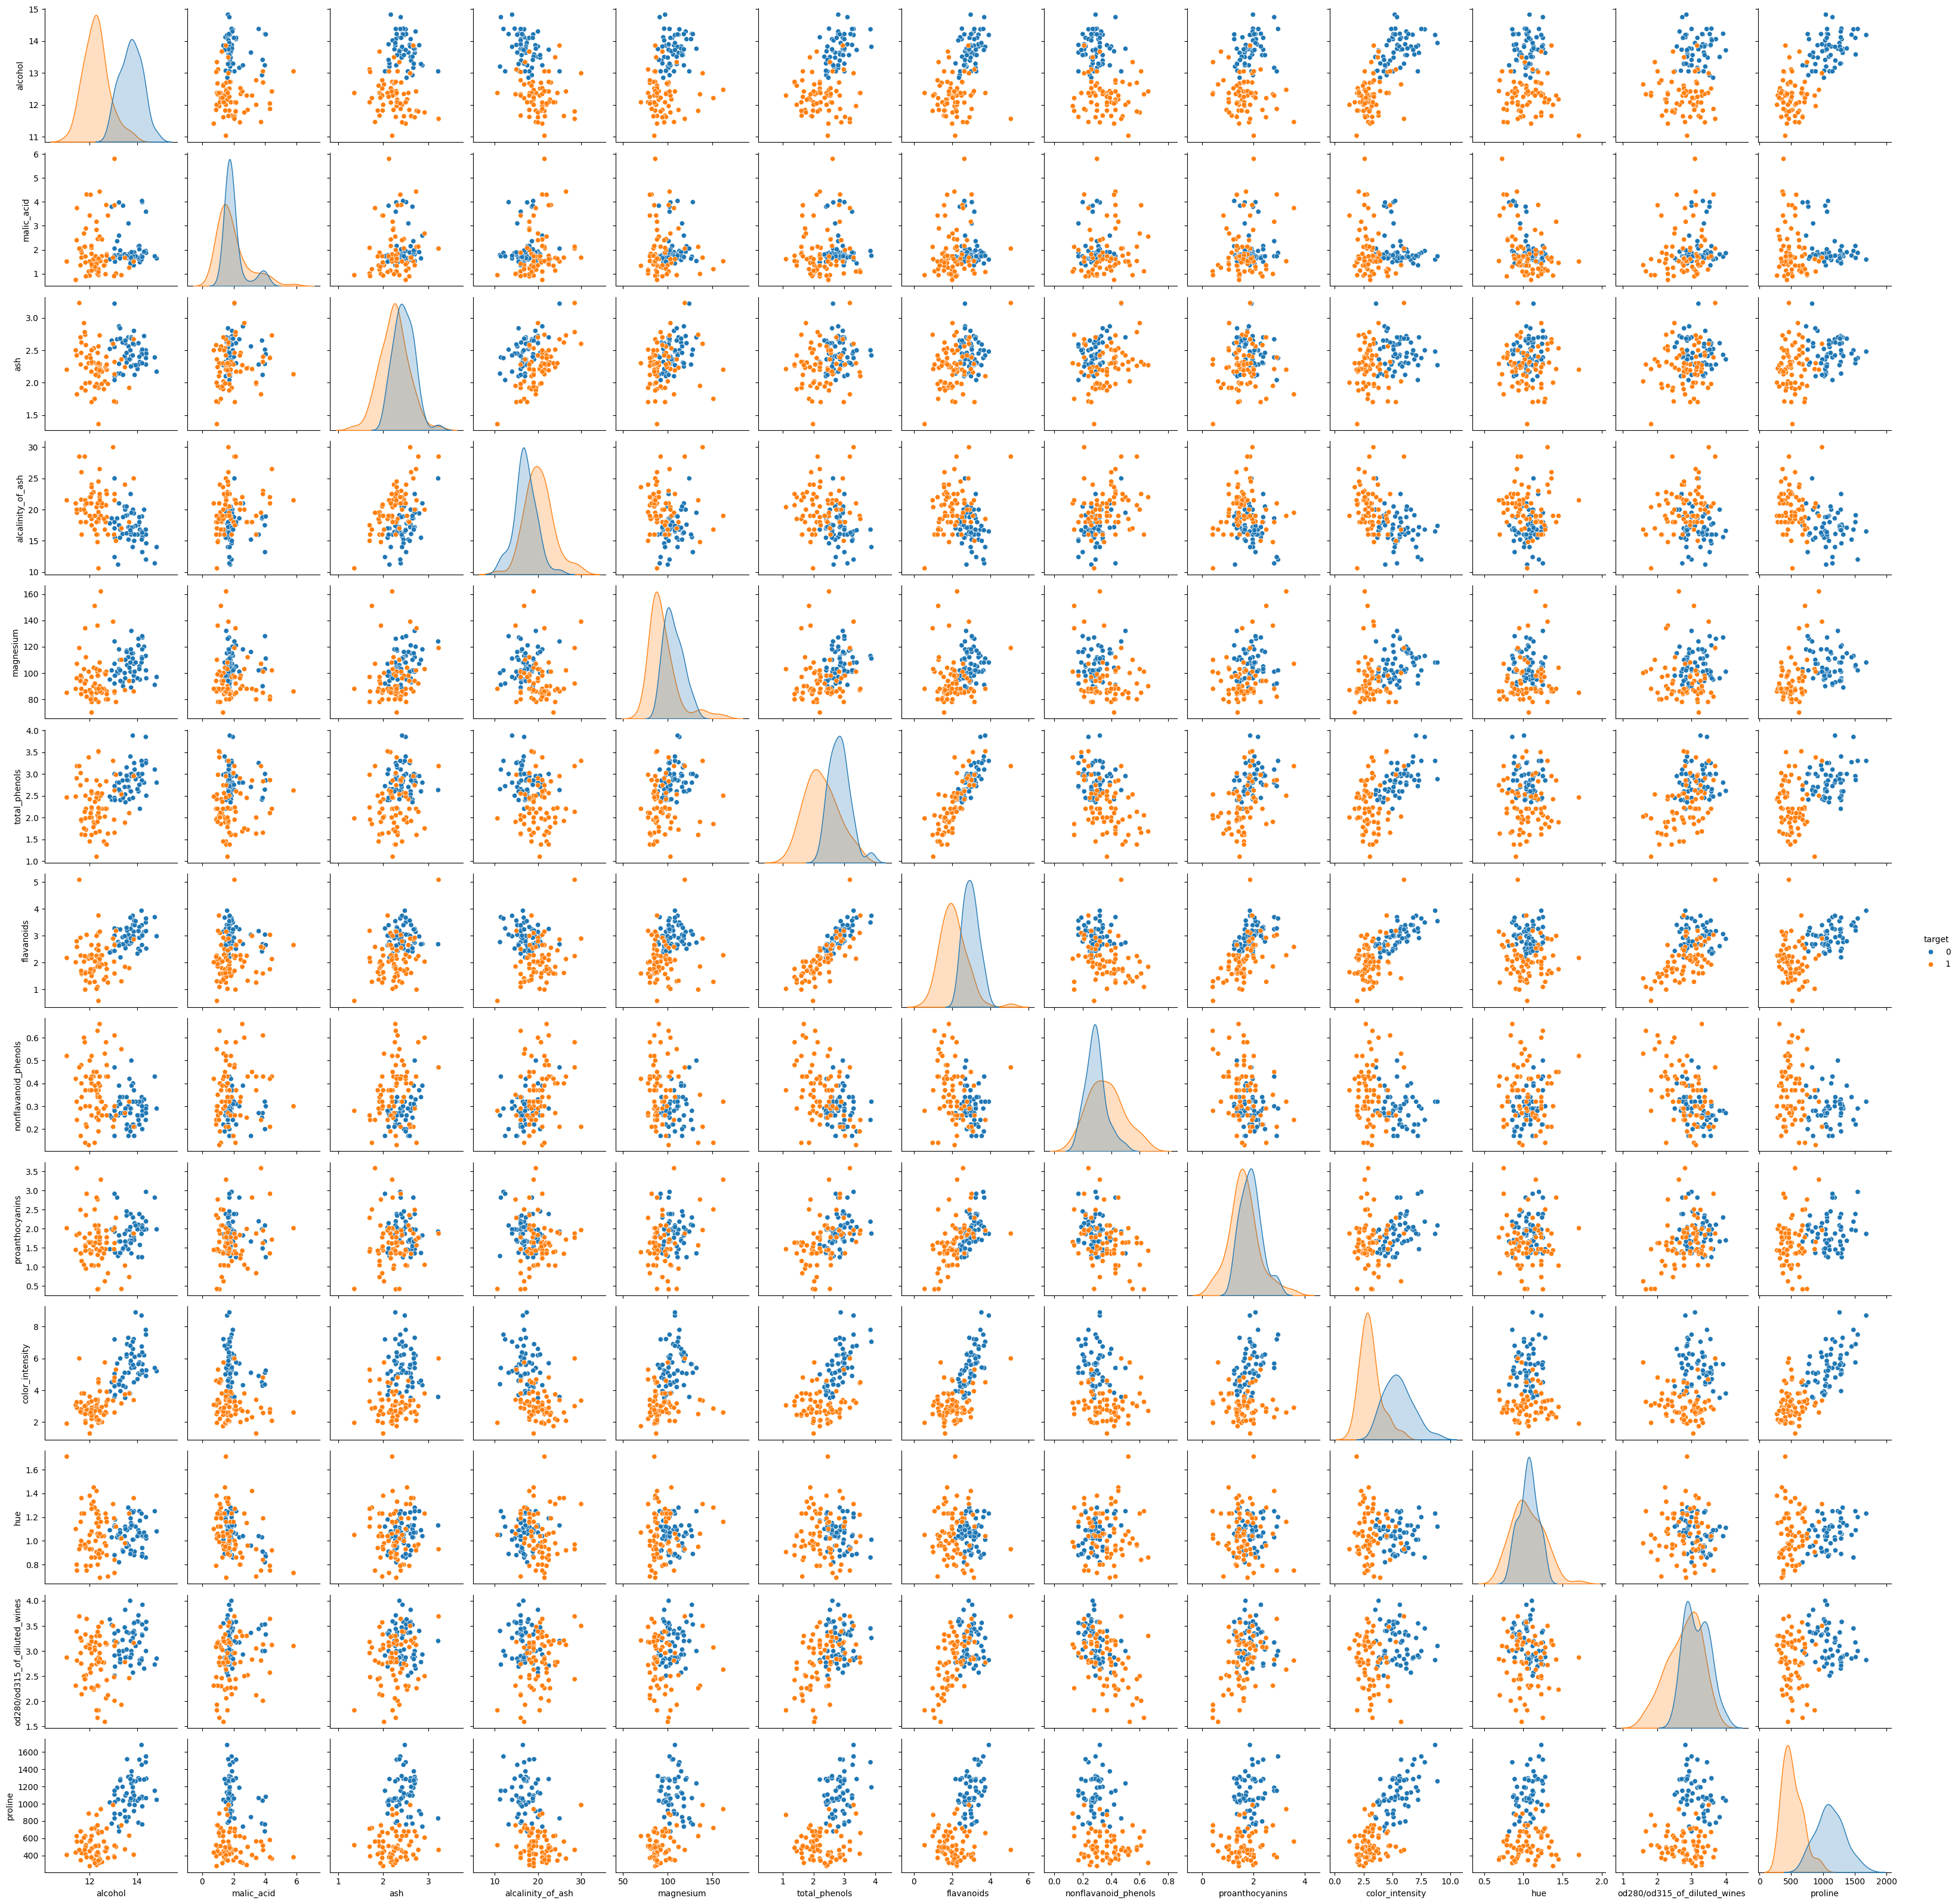

In [ ]:
sns.pairplot(data, hue='target')
plt.show()

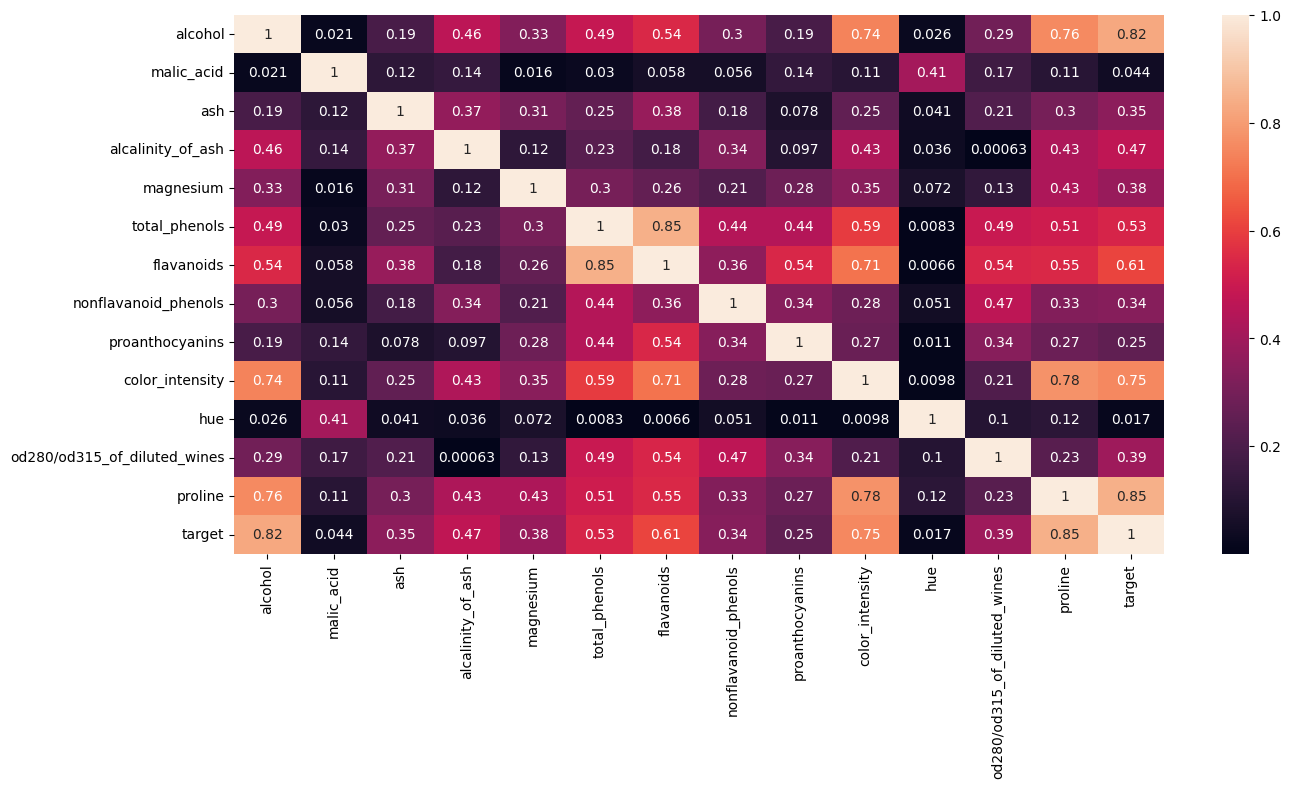

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

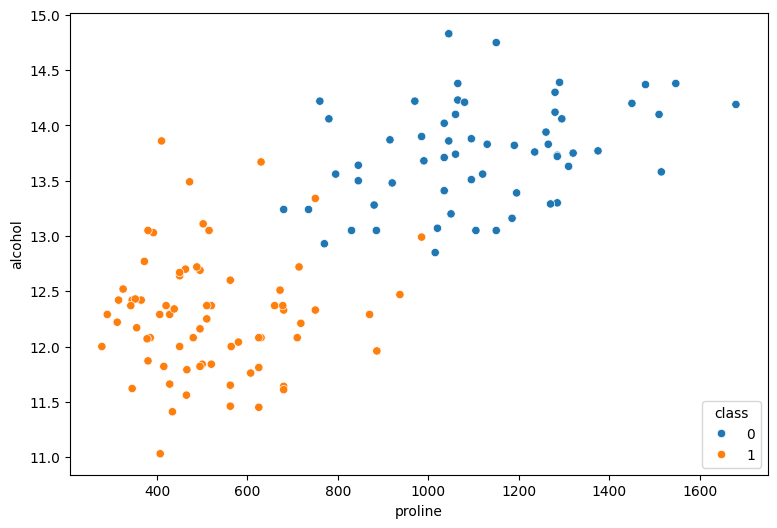

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data['proline'], y=data['alcohol'], hue=data.target)
plt.legend(title='class', loc='lower right')
plt.show()

In [ ]:
X = data[['proline', 'alcohol']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0])

In [ ]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'F1-score = {f1}')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1-score = 0.9230769230769231
Accuracy = 0.9230769230769231
Precision = 0.9230769230769231
Recall = 0.9230769230769231

Confusion Matrix:
[[12  1]
 [ 1 12]]


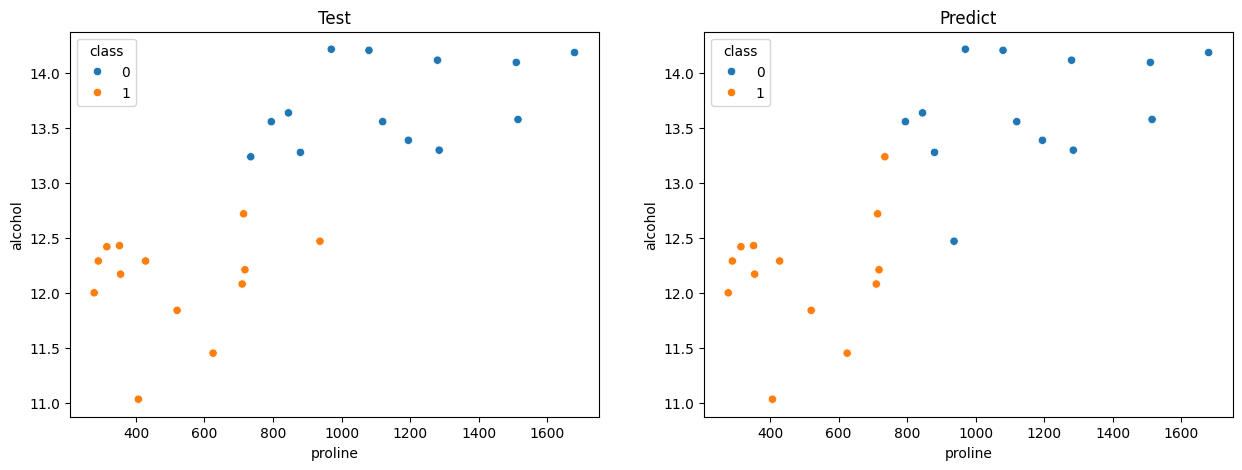

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test.proline, y=X_test.alcohol, hue=y_test)
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.proline, y=X_test.alcohol, hue=y_pred)
plt.legend(title='class')
plt.title('Predict')

plt.show()

In [ ]:
# Стандартизация
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0])

In [ ]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'F1-score = {f1}')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1-score = 0.962962962962963
Accuracy = 0.9615384615384616
Precision = 0.9285714285714286
Recall = 1.0

Confusion Matrix:
[[12  1]
 [ 0 13]]


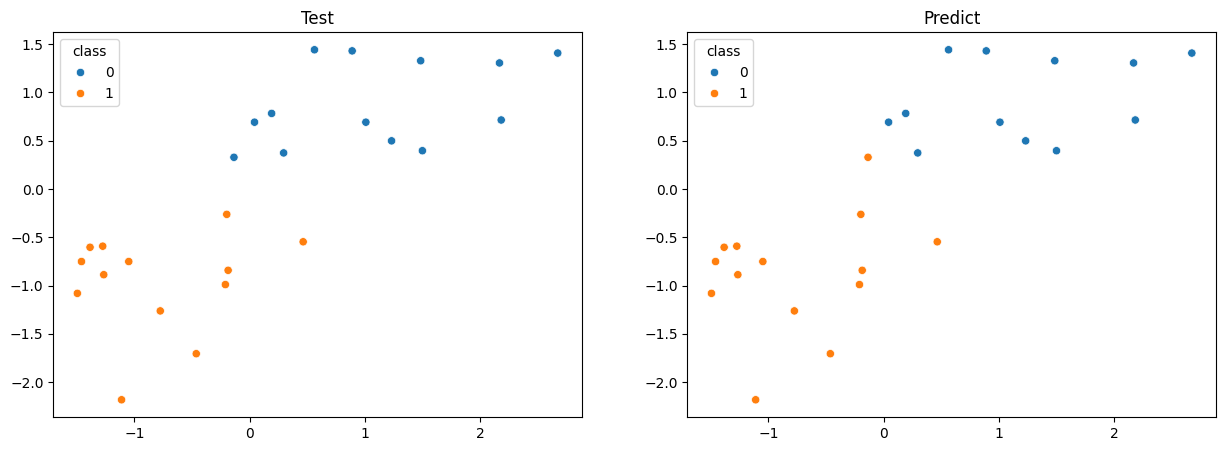

In [ ]:
x_proline = []
x_alcohol = []

for i in range(len(X_test)):
  x_proline.append(X_test[i][0])
  x_alcohol.append(X_test[i][-1])


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=x_proline, y=x_alcohol, hue=y_test)
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 2, 2)
sns.scatterplot(x=x_proline, y=x_alcohol, hue=y_pred)
plt.legend(title='class')
plt.title('Predict')

plt.show()

Признаки proline и alcohol сильно коррелируют с target и между собой, что может повлиять на результат.

При стандартизации признаков proline и alcohol улучшились ошибки. F1-score, Accuracy с ~92% до ~96%, а Recall вообще стал равен 1.

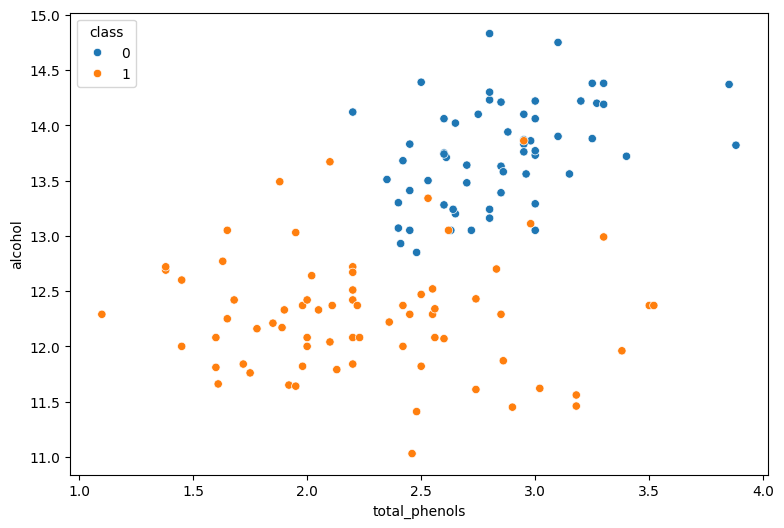

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data['total_phenols'], y=data['alcohol'], hue=data.target)
plt.legend(title='class')
plt.show()

In [ ]:
X = data[['total_phenols', 'alcohol']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0])

In [ ]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'F1-score = {f1}')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1-score = 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0

Confusion Matrix:
[[13  0]
 [ 0 13]]


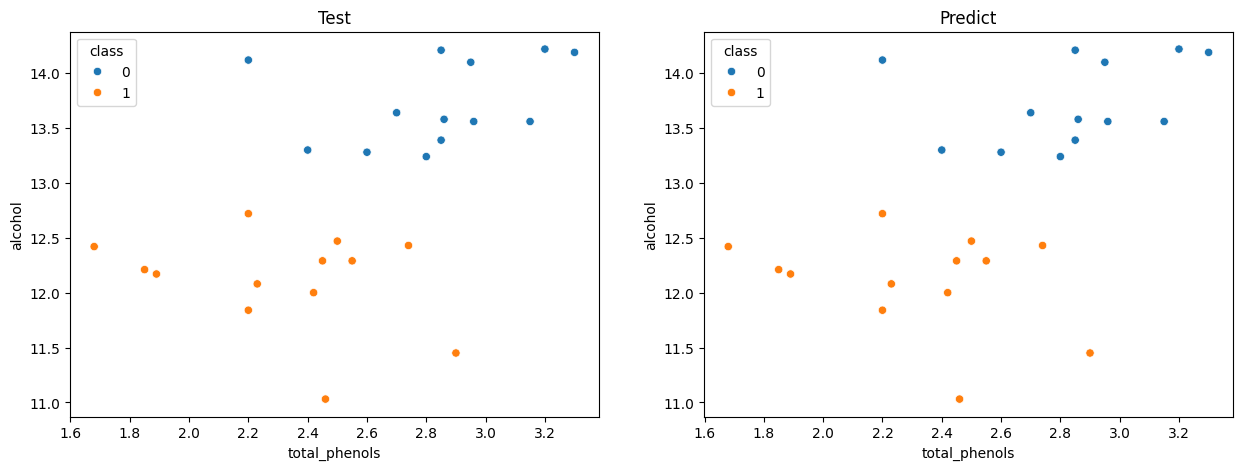

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test.total_phenols, y=X_test.alcohol, hue=y_test)
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.total_phenols, y=X_test.alcohol, hue=y_pred)
plt.legend(title='class')
plt.title('Predict')

plt.show()

Наилучшй результат показала модель с признакими total_phenols и alcohol, между которыми наблюдается небольшая связь корреляции. На результат модели также повлияло то, что в тестовую выборку не попали выбросы.

**Модель логистической мультиклассовой классификации**

In [ ]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [ ]:
df.shape

(178, 14)

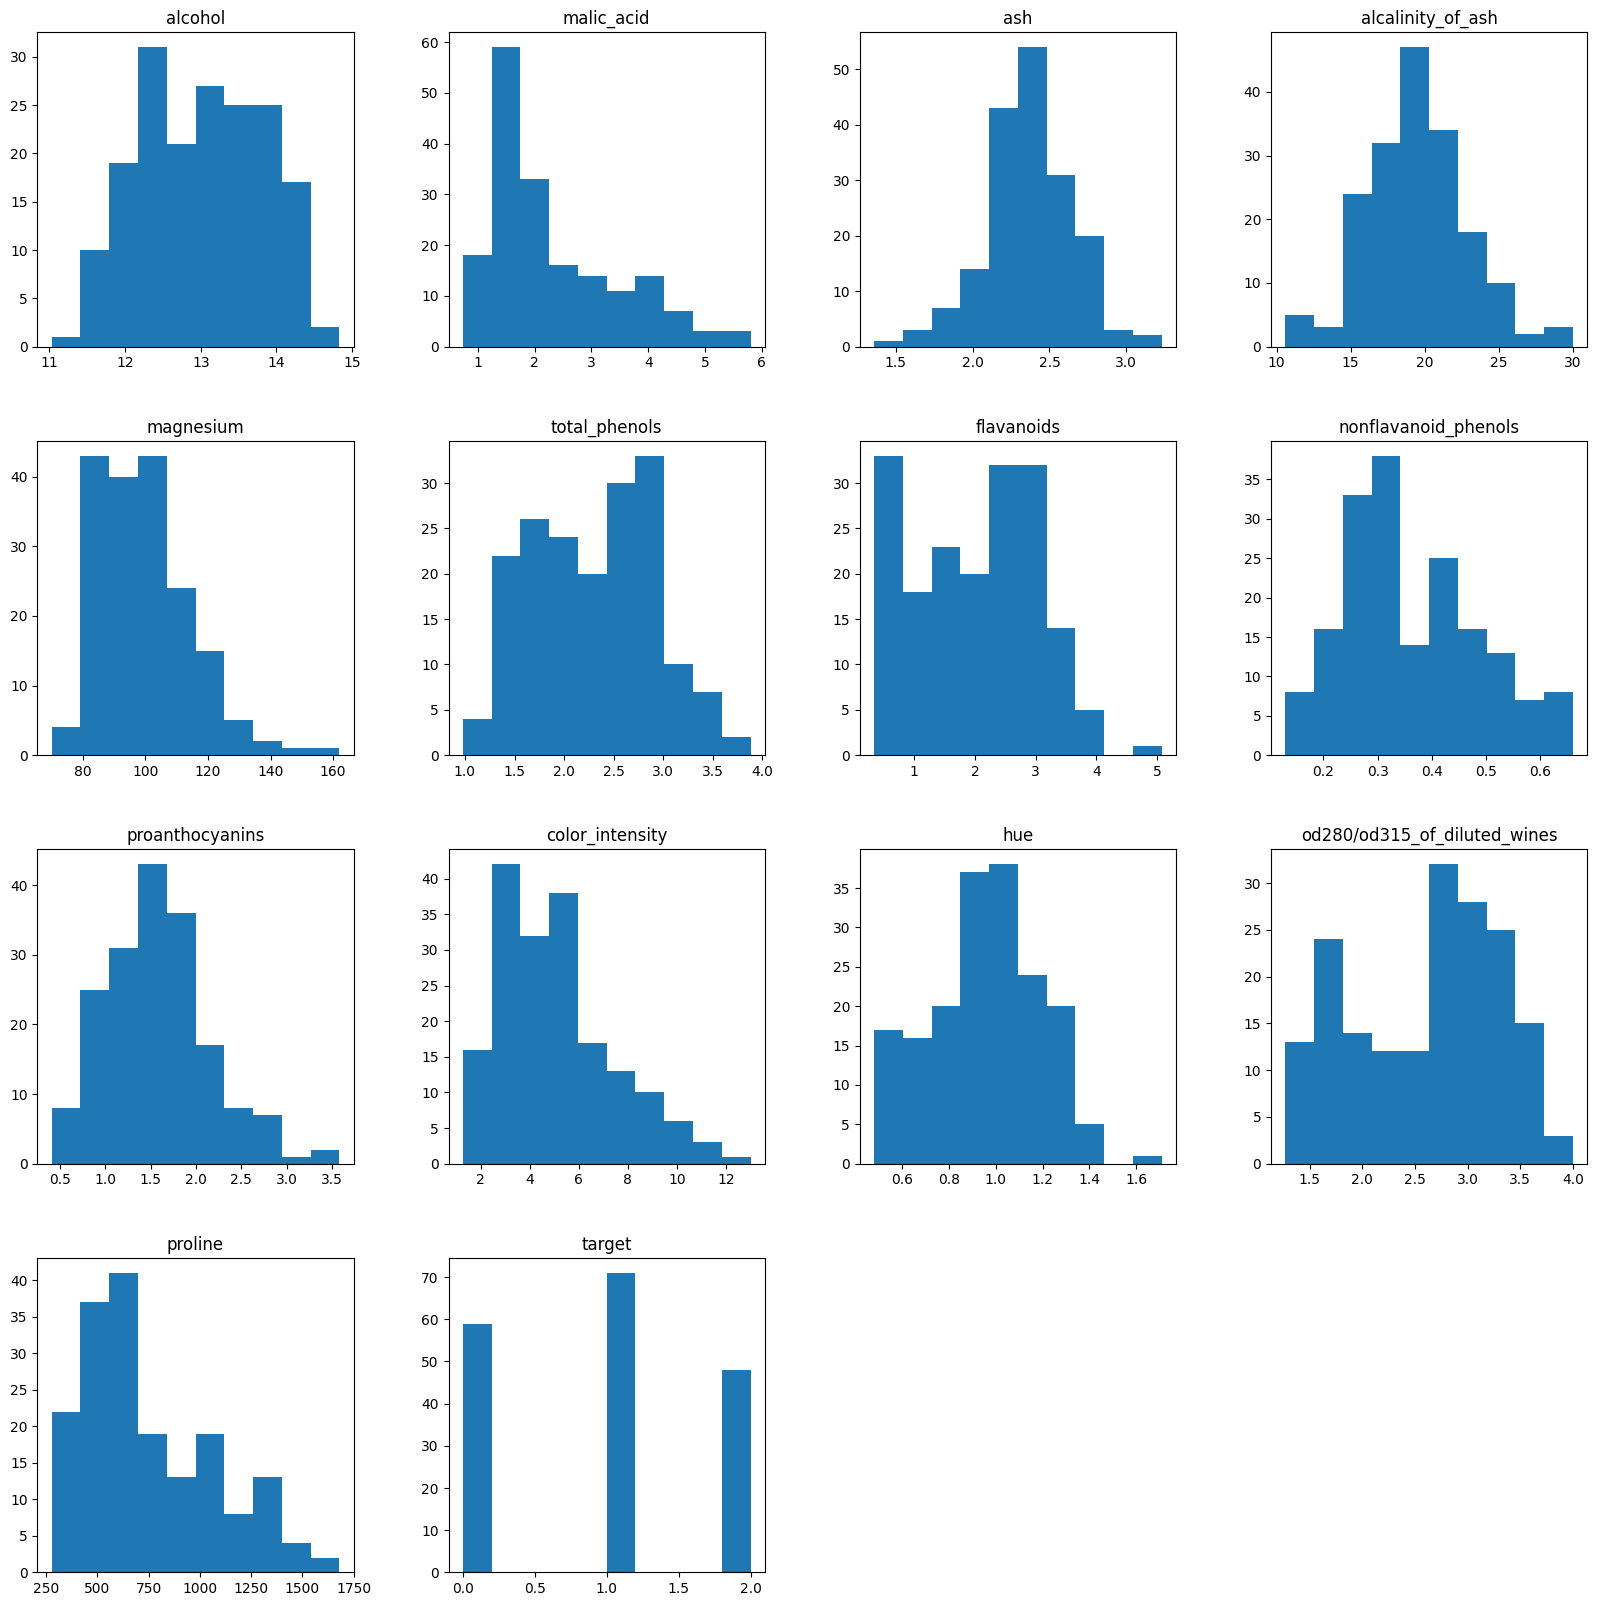

In [ ]:
df.hist(figsize=(20, 20), grid=False)
plt.show()

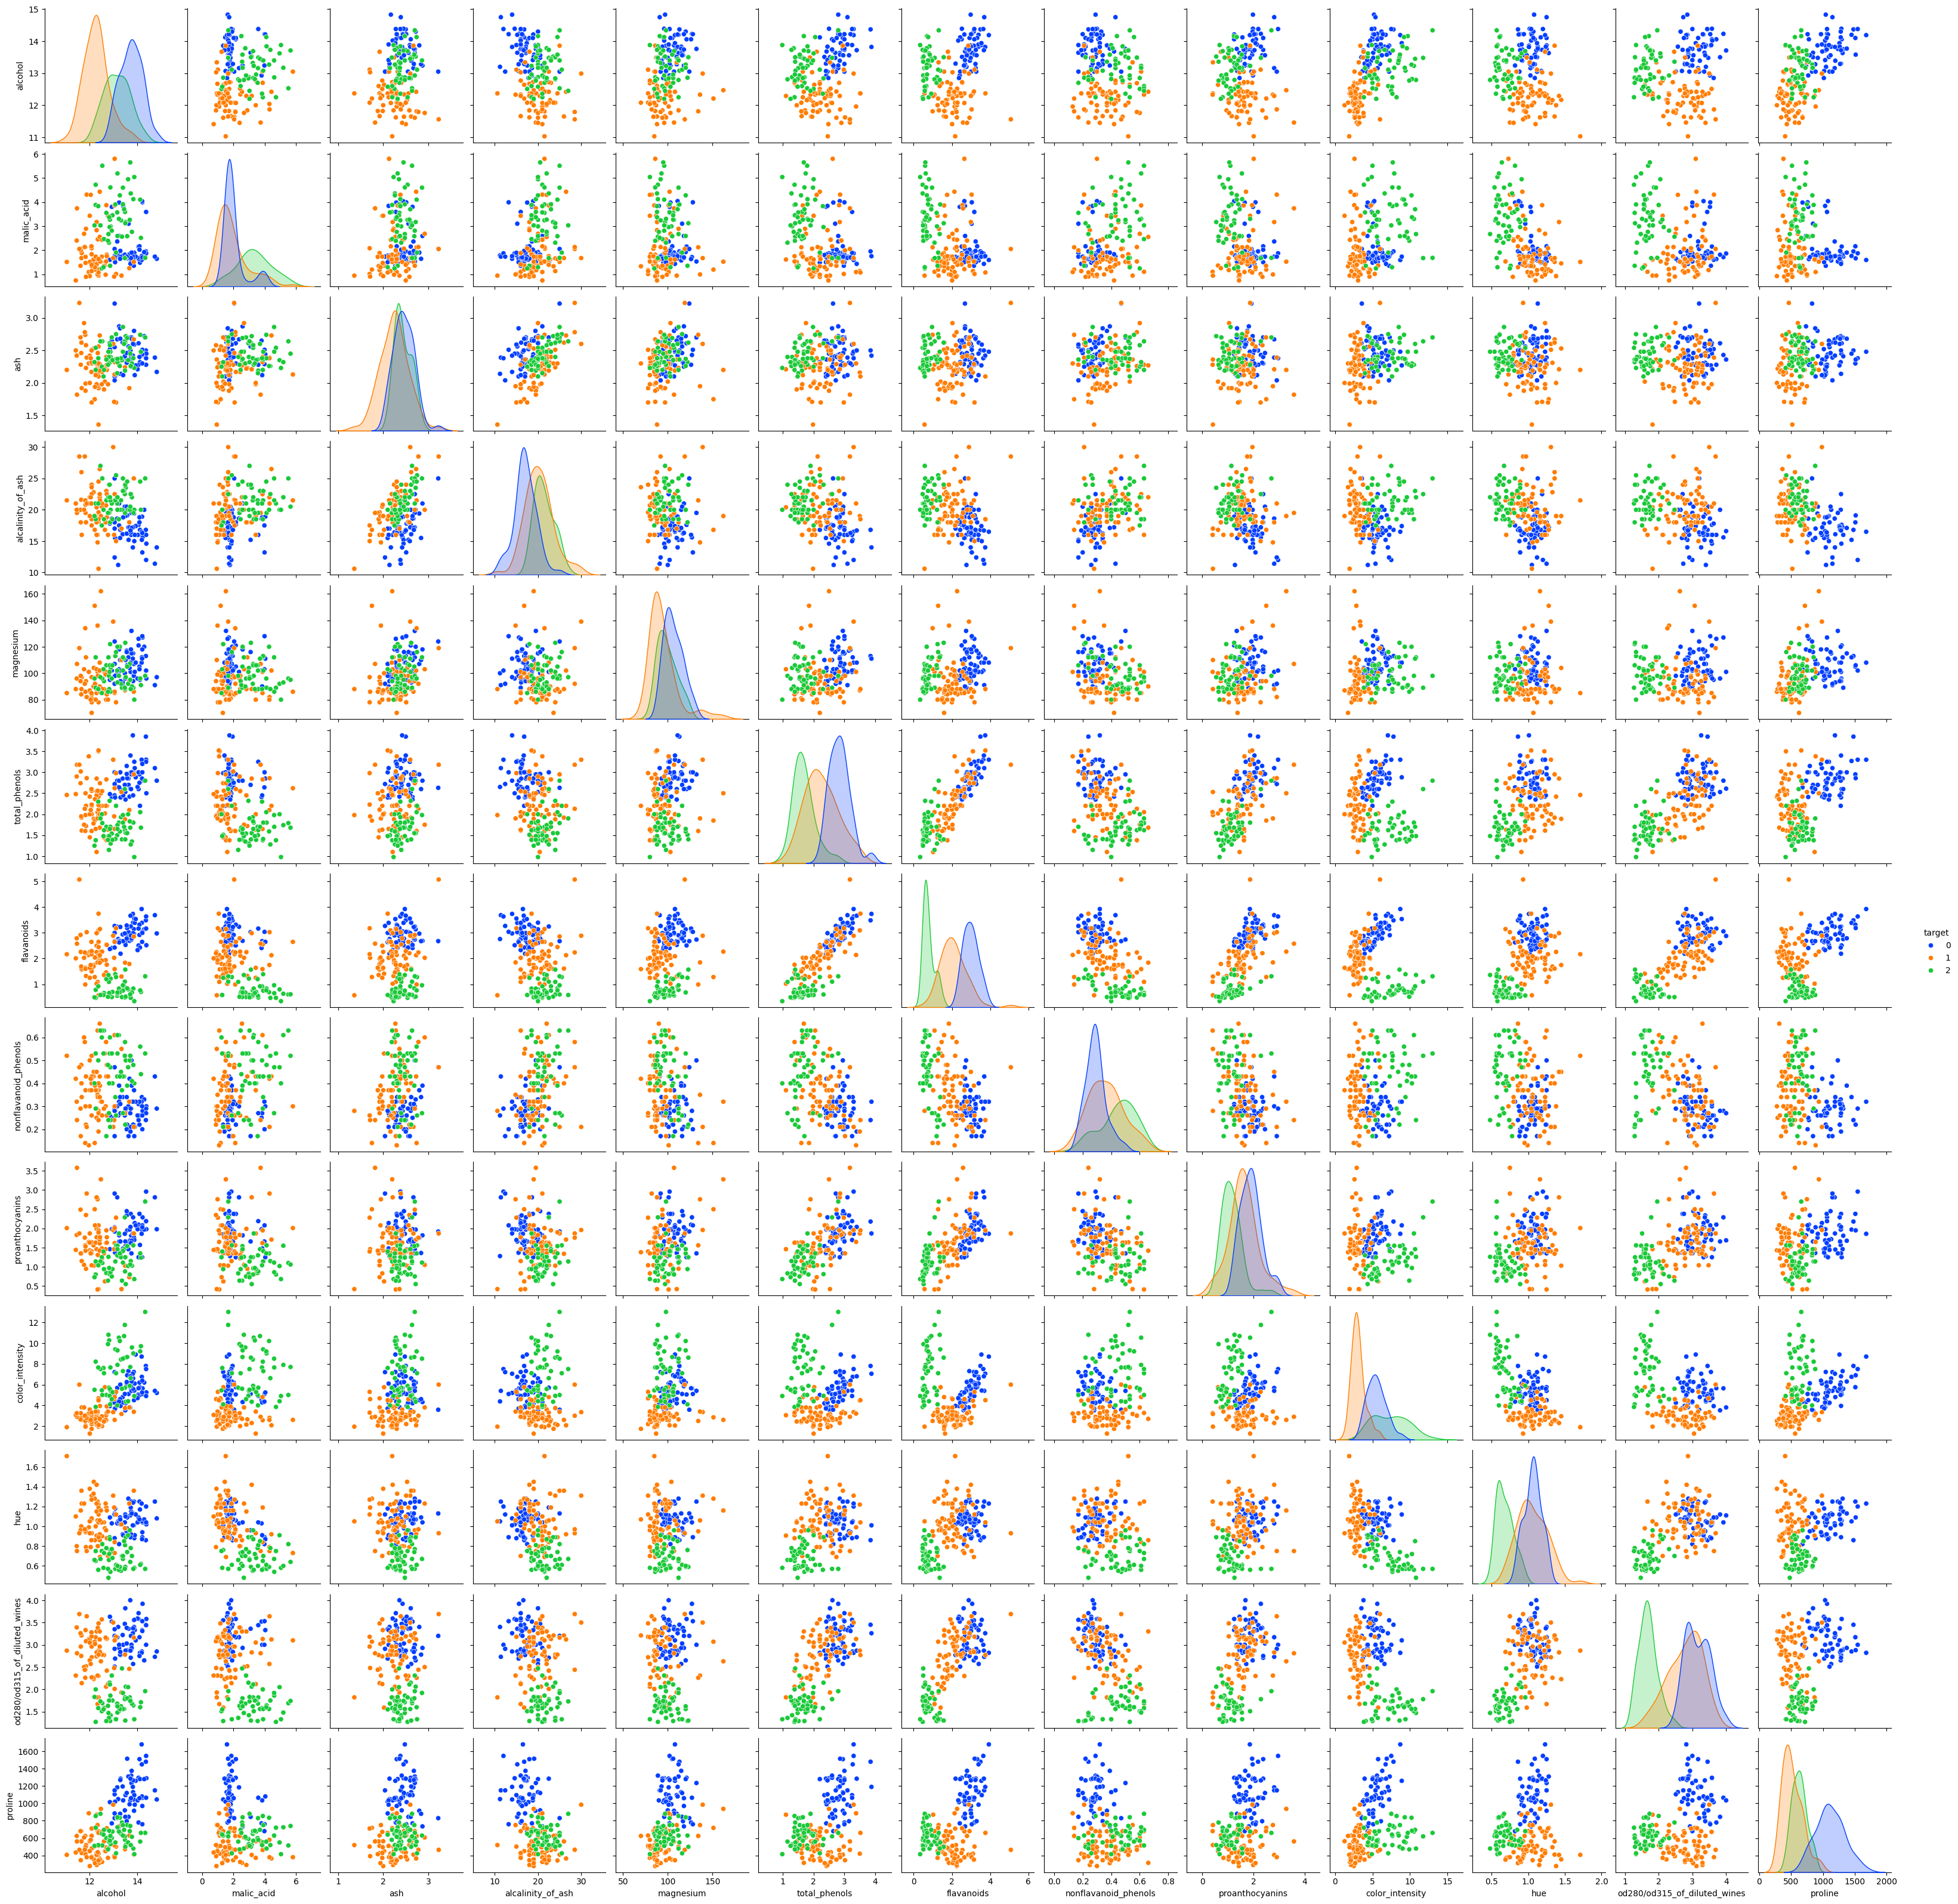

In [ ]:
sns.pairplot(df, hue='target', palette='bright')
plt.show()

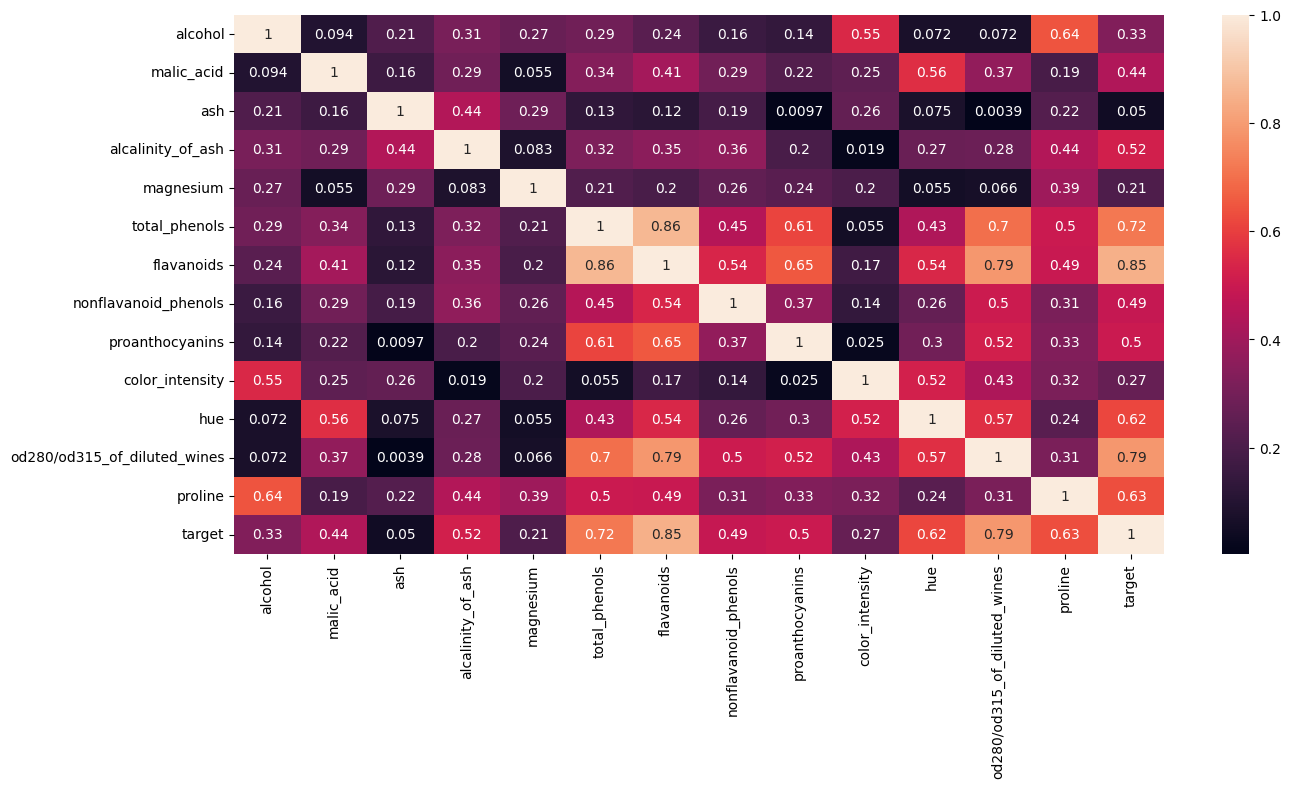

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

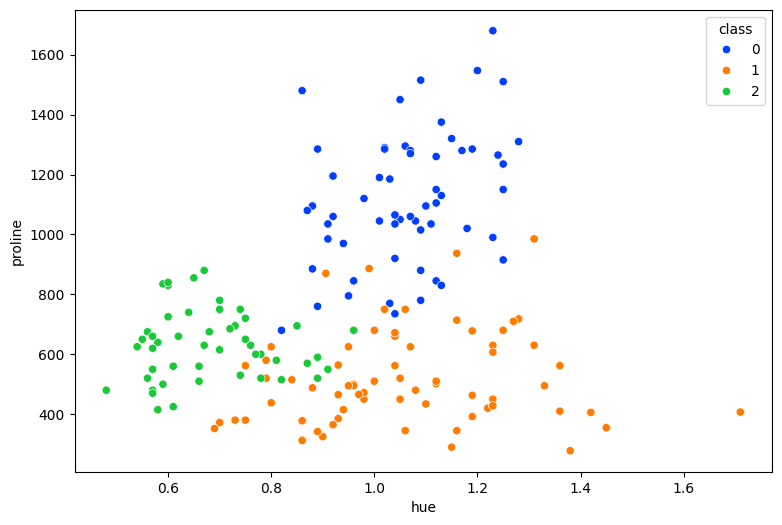

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['hue'], y=df['proline'], hue=df['target'], palette = 'bright')
plt.legend(title='class')
plt.show()

In [ ]:
# Тестовая выборка = 20%
X = df[['hue', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

report = classification_report(y_test, y_pred)
print(f'\n{report}')

Accuracy = 1.0

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



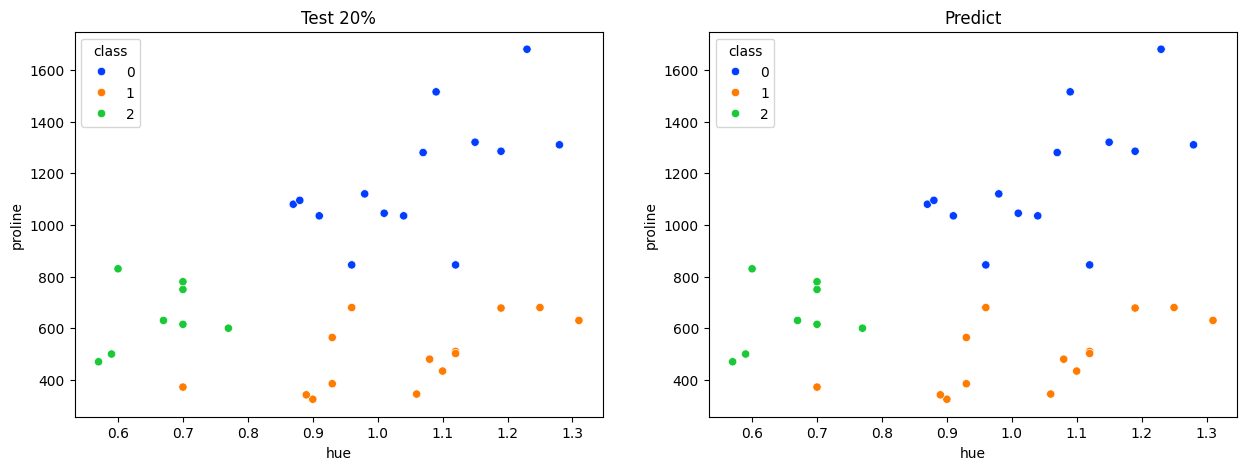

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['hue'], y=X_test['proline'], hue=y_test, palette = 'bright')
plt.legend(title='class', loc='upper left')
plt.title('Test 20%')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['hue'], y=X_test['proline'], hue=y_pred, palette = 'bright')
plt.legend(title='class', loc='upper left')
plt.title('Predict')

plt.show()

In [ ]:
# Тестовая выборка = 30%
X = df[['hue', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

report = classification_report(y_test, y_pred)
print(f'\n{report}')

Accuracy = 0.9629629629629629

Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  2 12]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        21
           2       1.00      0.86      0.92        14

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.97      0.96      0.96        54



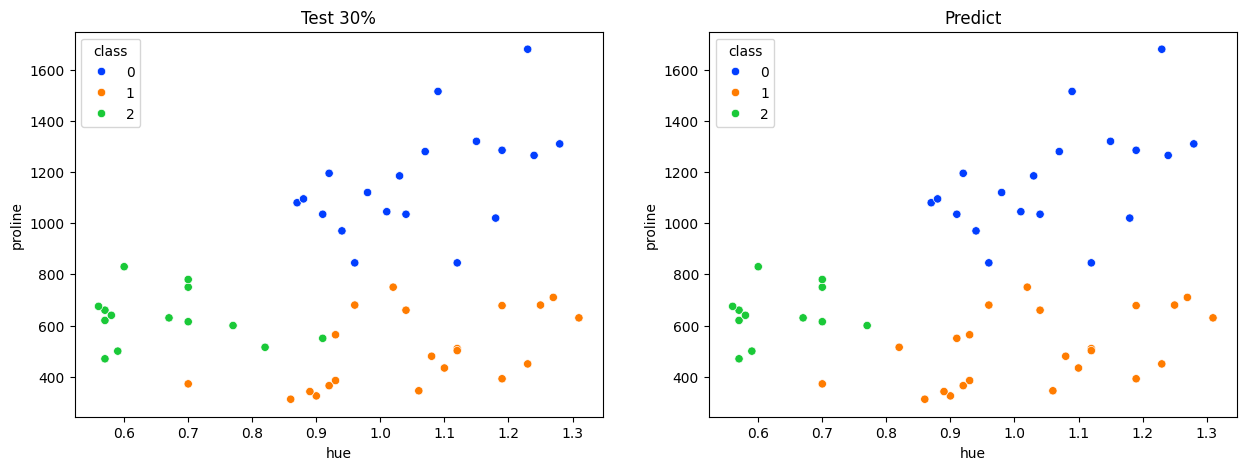

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['hue'], y=X_test['proline'], hue=y_test, palette = 'bright')
plt.legend(title='class', loc='upper left')
plt.title('Test 30%')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['hue'], y=X_test['proline'], hue=y_pred, palette = 'bright')
plt.legend(title='class', loc='upper left')
plt.title('Predict')

plt.show()

Признаки proline и hue хорошо коррелируют с target, но между друг другом слабо.

При тестовой выборке в 20% результаты ошибок равны 1, при выборке в 30% ошибки снизились (в выборку попали выбросы).

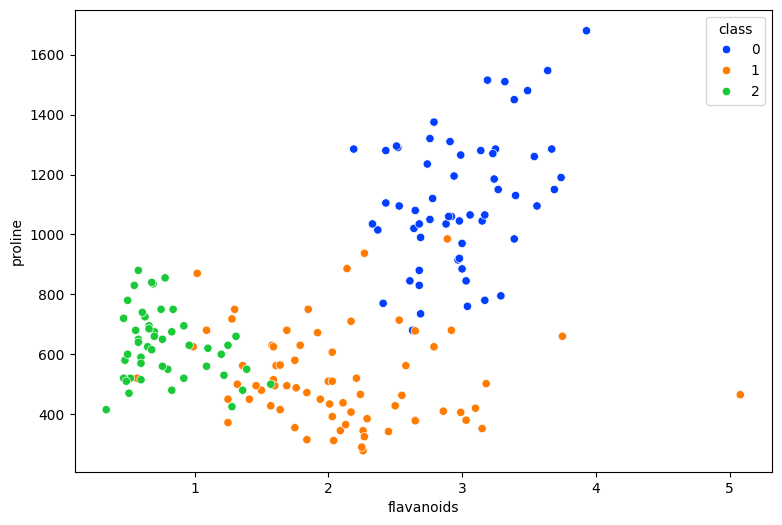

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['flavanoids'], y=df['proline'], hue=df['target'], palette = 'bright')
plt.legend(title='class')
plt.show()

In [ ]:
X = df[['flavanoids', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

report = classification_report(y_test, y_pred)
print(f'\n{report}')

Accuracy = 0.9444444444444444

Confusion Matrix:
[[14  0  0]
 [ 0 13  1]
 [ 0  1  7]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.93      0.93        14
           2       0.88      0.88      0.88         8

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36



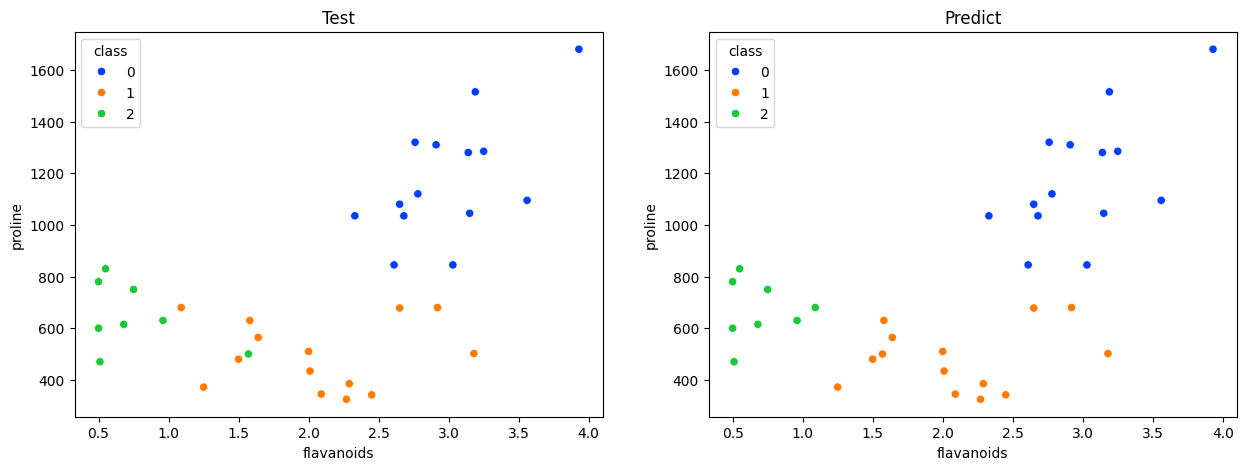

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_test, palette = 'bright')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_pred, palette = 'bright')
plt.legend(title='class')
plt.title('Predict')

plt.show()

Неплохие результаты показала модель с признакими flavanoids и proline. Accuracy = 0.94, F1-score для 0 класса = 1, для 1 = 0.93, для 2 = 0.88.